               상호명    시도명  시군구명      상권업종소분류명                      도로명주소  \
320        꿈나무종합팻트  부산광역시   강서구  애견/애완/동물사육판매      부산광역시 강서구 봉죽길243번길 62   
555             대성  부산광역시   기장군  애견/애완/동물사육판매  부산광역시 기장군 기장읍 기장대로 460-21   
874     내추럴발란스서부경남  부산광역시   사하구          동물병원      부산광역시 사하구 두송로144번길 51   
4806          미미애견  부산광역시   수영구  애견/애완/동물사육판매        부산광역시 수영구 광남로 156-1   
4944        세인트루이스  부산광역시   금정구      애완동물 미용실       부산광역시 금정구 서곡로20번길 19   
...            ...    ...   ...           ...                        ...   
562530      도그스테이션  부산광역시  해운대구  애견/애완/동물사육판매        부산광역시 해운대구 해운대로 620   
563270      바다동물병원  부산광역시   수영구          동물병원          부산광역시 수영구 광남로 125   
565442        안녕하개  부산광역시   사상구  애견/애완/동물사육판매         부산광역시 사상구 가야대로 374   
566362     38도씨애견샵  부산광역시   금정구  애견/애완/동물사육판매         부산광역시 금정구 온천장로 143   
567215        노비에스  부산광역시    동구  애견/애완/동물사육판매          부산광역시 동구 중앙대로 319   

                경도         위도  
320     128.887506  35.184811  
555     129.219107  35.

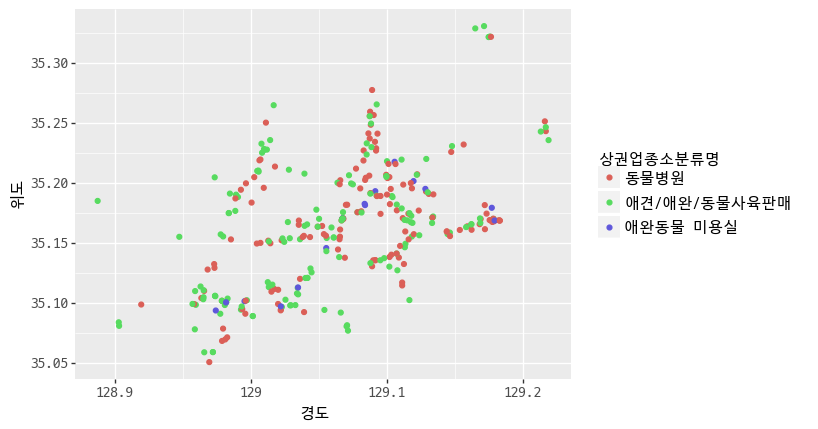

<ggplot: (8781880955057)>

In [16]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from plotnine import *
import plotnine
import missingno as msno
import pandas as pd
import numpy as np
import re
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

# csv 파일 읽어오기
shop_df = pd.read_csv('/home/vscode/analysisdev/data6/소상공인시장진흥공단_상가업소정보_201909_01.csv', encoding='utf-8')

# print(shop_df.shape)
# print(shop_df.head())
# print(shop_df.info())
# print(shop_df.isnull().sum())

shop_df = shop_df[['상호명', '시도명', '시군구명', '상권업종소분류명', '도로명주소', '경도', '위도']]
shop_df.dropna(how='any', inplace=True)

mask = (shop_df.시도명 == '부산광역시') & (shop_df.상권업종소분류명.str.contains('동물'))
shop_df = shop_df.loc[mask, :]

print(shop_df)


# plotnine 라이브러리
(ggplot(shop_df)
+ aes(x='경도', y='위도', color='상권업종소분류명')
+ geom_point(alpha=1, size=1.5)
+ theme(text=element_text(fontproperties=font_name))
+ scale_fill_gradient(low='blue', high='green')
)